In [32]:
%load_ext watermark

In [33]:
%watermark

2017-03-23T05:24:30

CPython 2.7.6
IPython 5.1.0

compiler   : GCC 4.8.4
system     : Linux
release    : 4.4.0-21-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [34]:
import tensorflow as tf
print(tf.__version__)

1.0.1


## sympy

In [4]:
import sympy
sympy.init_printing(use_unicode=True)

In [11]:
x = sympy.symbols('x')
w, b = sympy.symbols('w b')

In [12]:
w*sympy.sin(x) + b

In [13]:
# 求导 
sympy.diff( w * sympy.sin(x) + b, x)

In [8]:
x

In [9]:
x ** 2

In [1]:
pwd

u'/notebooks/w3_Tensorflow-NN'

## Tensorflow 实现线性回归

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import tensorflow as tf
import numpy as np

### Constant

In [3]:
c = tf.constant([1, 2, 3])
print(c)

Tensor("Const:0", shape=(3,), dtype=int32)


In [4]:
type(c)

tensorflow.python.framework.ops.Tensor

- Constant 是一种 Tensor
  - Tensor 类似 numpy 中的 array。我们常用的是一维（向量）、二维（矩阵）结构
- 为什么 print 看不到 c 的值
  - 在这里知识 “声明” 了这个 Tensor

In [6]:
g = tf.get_default_graph()
g.as_graph_def().node

[name: "Const"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_INT32
      tensor_shape {
        dim {
          size: 3
        }
      }
      tensor_content: "\001\000\000\000\002\000\000\000\003\000\000\000"
    }
  }
}
]

In [154]:
g

In [8]:
d= tf.constant([0,0,0,0])

In [25]:
g = tf.get_default_graph()
g.as_graph_def().node

[name: "Const"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_INT32
      tensor_shape {
        dim {
          size: 3
        }
      }
      tensor_content: "\001\000\000\000\002\000\000\000\003\000\000\000"
    }
  }
}
]

- Tensorflow 中会有一个默认的 “Graph”，所有 “声明” 的操作都记录在这个 Graph 上
- Graph要通过 Session 来执行

In [157]:
sess = tf.Session()
sess.run(c)

array([1, 2, 3], dtype=int32)

In [158]:
with tf.Session() as sess:
    r = sess.run(c)
    print(type(r))
    print(r)

<type 'numpy.ndarray'>
[1 2 3]


- c 在 Graph 里是一个 Tensor，Session 执行之后返回的是 numpy array
- Graph：执行蓝图（有向无环图）
- Session：具体执行

好处是什么：  
- 可并行
- Graph 的不同部分可以放到不同的设备上

Tensorflow Graph 上的两种 Node：
- Tensor
- Operation

In [159]:
c2 = c + c
print(c2)

Tensor("add:0", shape=(3,), dtype=int32)


- 添加了一个 Node：“Add” 的 Operation

In [160]:
g = tf.get_default_graph()
g.as_graph_def().node

[name: "Const"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_INT32
      tensor_shape {
        dim {
          size: 3
        }
      }
      tensor_content: "\001\000\000\000\002\000\000\000\003\000\000\000"
    }
  }
}
, name: "Const_1"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_INT32
      tensor_shape {
        dim {
          size: 4
        }
      }
      tensor_content: "\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000"
    }
  }
}
, name: "add"
op: "Add"
input: "Const"
input: "Const"
attr {
  key: "T"
  value {
    type: DT_INT32
  }
}
]

- 需要放到一个 Session 中运行：  

In [161]:
with tf.Session() as sess:
    print(sess.run(c2))

[2 4 6]


### 随机数  

- 在 Tensorflow 里也是一种 Tensor

In [162]:
sess = tf.Session()

In [163]:
sess

In [164]:
r = tf.random_uniform([3], -1.0, 1.0)  # [3] 表示随机数的长度
r

<tf.Tensor 'random_uniform:0' shape=(3,) dtype=float32>

- 返回的是 Tensor

In [165]:
sess.run(r)

array([-0.6253829 , -0.61031389,  0.43858719], dtype=float32)

### Variable 的概念  

- Tensorflow 中的 Variable 对机器学习应用至关重要  
- 用 Tensor 赋值，能做 Tensor 相同的操作
- 和编程中【变量】的概念类似，用于维护一个可变的状态
- 不同 run 中间能保存状态

In [166]:
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W') # random 给变量做初始化，name 为看计算图方便
b = tf.Variable(tf.zeros([1]), name='b')

In [167]:
w,b

(<tensorflow.python.ops.variables.Variable at 0x7fba64d04f10>,
 <tensorflow.python.ops.variables.Variable at 0x7fba66092ed0>)

In [168]:
w + w

<tf.Tensor 'add_1:0' shape=(1,) dtype=float32>

- 变量能做 Tensor 能做的所有事情

- 直接 run(w) 会报错，因为没有初始化 w：

In [170]:
sess.run(w)

FailedPreconditionError: Attempting to use uninitialized value W
	 [[Node: _send_W_0 = _Send[T=DT_FLOAT, client_terminated=true, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=3304083577933568163, tensor_name="W:0", _device="/job:localhost/replica:0/task:0/cpu:0"](W)]]

- **变量**需要一个专门的初始化过程
  - 可以使用 `tf.global_variables_initializer()` 增加一个 operation，初始化所有变量（不是之前的 Constant）

In [172]:
init = tf.global_variables_initializer()
sess.run(init)  # 必须的，第一次初始化变量时运行，这个特么就是 run tf.globa_variables_initializer() 啊
sess.run(w)

array([-0.35996008], dtype=float32)

In [174]:
# 变量不动 
sess.run(w)

array([-0.35996008], dtype=float32)

In [176]:
# 重新初始化变量
sess.run(init)
sess.run(w)

array([-0.77116442], dtype=float32)

- 有了变量，我们知道还要有数据才能计算 Cost

### Tensorflow 线性回归

In [177]:
x = np.arange(0, 20)
y = x + np.random.normal(size=20)

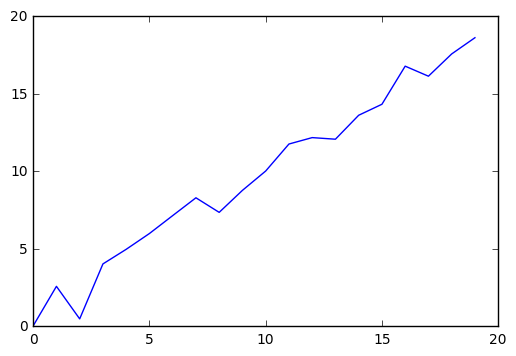

In [178]:
plt.plot(x,y)

In [179]:
y_bar = w * x + b
cost = tf.reduce_mean((y_bar-y) ** 2)

In [180]:
y_bar, cost

(<tf.Tensor 'add_2:0' shape=(20,) dtype=float32>,
 <tf.Tensor 'Mean:0' shape=() dtype=float32>)

In [181]:
print(sess.run(cost))

385.812


In [182]:
print(sess.run([w,b]))

[array([-0.77116442], dtype=float32), array([ 0.], dtype=float32)]


In [190]:
sess.run(tf.global_variables_initializer()) # 初始化
print(sess.run([w,b]))
print(sess.run(cost))

[array([ 0.22223043], dtype=float32), array([ 0.], dtype=float32)]
74.4226


### Graph 图

- 清除 graph：

In [23]:
tf.reset_default_graph()

In [350]:
sess # 清除 graph 后， sess 仍然有

In [83]:
g = tf.get_default_graph()
g.as_graph_def().node

[]

In [17]:
# 重新在 graph 上声明元素

x = np.arange(0, 20)
y = x + np.random.normal(size=20)

w = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W') # random 给变量做初始化，name 为看计算图方便
b = tf.Variable(tf.zeros([1]), name='b')

y_bar = w * x + b
cost = tf.reduce_mean((y_bar - y) ** 2)

In [353]:
w * x

<tf.Tensor 'mul_1:0' shape=(20,) dtype=float32>

In [354]:
cost

<tf.Tensor 'Mean:0' shape=() dtype=float32>

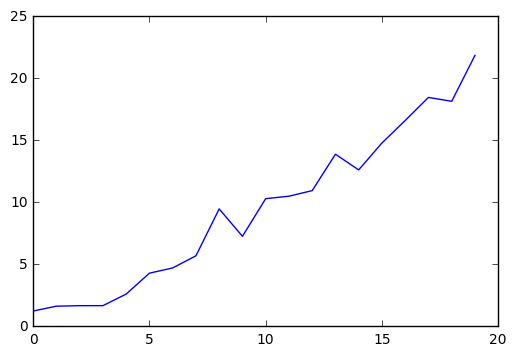

In [370]:
plt.plot(x,y)

#### 普通的 run，如果每次 run 初始化，则每次 cost 结果会变

In [362]:
sess = tf.Session()

In [363]:
sess.run(tf.global_variables_initializer())

In [364]:
sess.run(cost)

365.88272

In [365]:
print(sess.run([w, b]))
print(sess.run(cost))

[array([-0.70467281], dtype=float32), array([ 0.], dtype=float32)]
365.883


#### 局部生效

In [355]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run([w, b]))
    print(sess.run(cost))

[array([ 0.90113664], dtype=float32), array([ 0.], dtype=float32)]
1.94812


In [356]:
y_bar = np.asarray([0.9011364]) * x + 0

In [357]:
np.mean((y_bar - y) ** 2)

### 梯度下降

In [18]:
train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(cost)
costs = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        sess.run(train_step)
        cost_value = sess.run(cost)
        costs.append(cost_value)
        print(cost_value)
        print(sess.run([w, b]))

191.311
[array([-0.23571779], dtype=float32), array([ 0.00244096], dtype=float32)]
181.966
[array([-0.20504875], dtype=float32), array([ 0.00482167], dtype=float32)]
173.08
[array([-0.17514177], dtype=float32), array([ 0.00714363], dtype=float32)]
164.63
[array([-0.1459779], dtype=float32), array([ 0.00940831], dtype=float32)]
156.594
[array([-0.11753868], dtype=float32), array([ 0.01161712], dtype=float32)]
148.953
[array([-0.08980609], dtype=float32), array([ 0.01377145], dtype=float32)]
141.687
[array([-0.06276261], dtype=float32), array([ 0.01587267], dtype=float32)]
134.777
[array([-0.03639109], dtype=float32), array([ 0.01792208], dtype=float32)]
128.206
[array([-0.01067484], dtype=float32), array([ 0.01992097], dtype=float32)]
121.958
[array([ 0.01440242], dtype=float32), array([ 0.0218706], dtype=float32)]
116.017
[array([ 0.03885657], dtype=float32), array([ 0.0237722], dtype=float32)]
110.367
[array([ 0.06270309], dtype=float32), array([ 0.02562695], dtype=float32)]
104.994
[

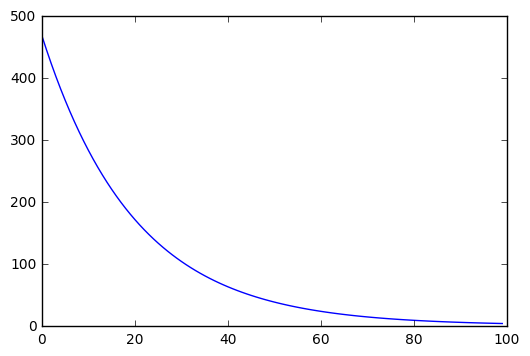

In [369]:
plt.plot(costs)

### 随机梯度下降

Placeholder
- Graph 是 虚 的，数据是 实 的
- 先用一个 虚 的 Node，替代 实 的数据，在运行过程中再不断填数据

In [19]:
tf.reset_default_graph()

In [24]:
x_placeholder = tf.placeholder('float')
y_placeholder = tf.placeholder('float')

w = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
b = tf.Variable(tf.zeros([1]), name='b')

y_bar = w * x_placeholder + b
cost = tf.reduce_mean(tf.square(y_bar - y_placeholder))

# 这里的 cost 就很虚，没数据

In [25]:
x_placeholder # Placeholder 类型，shape 可以指定，也可以不断变化

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [26]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [27]:
y

array([ -0.88610806,   1.26429297,   3.02028824,   4.47442937,
         2.83390628,   6.45204014,   6.48459455,   6.75393219,
        10.1332669 ,   8.1765203 ,   8.92343211,  10.63734646,
        12.89514302,  13.83722975,  14.26105457,  15.27300154,
        14.64113928,  17.58123011,  17.7388471 ,  18.83796875])

In [28]:
train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(cost)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        feed_dict = {x_placeholder:x.astype(float), y_placeholder:y} # 把 x 和 y 放入 一个 feed_dict
        sess.run(train_step, feed_dict=feed_dict)  # run 的时候把 feed_dict 作为参数传给 train_step
        print(sess.run(cost, feed_dict=feed_dict)) # 只要用到 x_placeholder 和 y_placeholder 的就要把 feed_dict 数据作为参数给它
        print(sess.run([w, b]))

268.01
[array([-0.46472624], dtype=float32), array([ 0.00288709], dtype=float32)]
254.901
[array([-0.42840153], dtype=float32), array([ 0.00570283], dtype=float32)]
242.435
[array([-0.39297941], dtype=float32), array([ 0.00844899], dtype=float32)]
230.581
[array([-0.35843742], dtype=float32), array([ 0.01112729], dtype=float32)]
219.309
[array([-0.3247537], dtype=float32), array([ 0.01373943], dtype=float32)]
208.59
[array([-0.29190695], dtype=float32), array([ 0.01628705], dtype=float32)]
198.397
[array([-0.25987637], dtype=float32), array([ 0.01877176], dtype=float32)]
188.704
[array([-0.22864164], dtype=float32), array([ 0.0211951], dtype=float32)]
179.487
[array([-0.19818301], dtype=float32), array([ 0.02355862], dtype=float32)]
170.722
[array([-0.16848122], dtype=float32), array([ 0.02586379], dtype=float32)]
162.387
[array([-0.13951743], dtype=float32), array([ 0.02811207], dtype=float32)]
154.461
[array([-0.11127332], dtype=float32), array([ 0.03030486], dtype=float32)]
146.925


- 实际可以传入随机样本数据

In [8]:
tf.reset_default_graph()

In [15]:
c = tf.constant([1, 2, 3])

In [13]:
b = tf.Variable(tf.zeros([1]), name='b')

In [11]:
tf.get_default_graph()

In [29]:
writer = tf.summary.FileWriter("/notebooks/OMOOC.DeepLearning/w3_Tensorflow-NN/", graph=tf.get_default_graph())

In [25]:
writer.flush()

In [4]:
pwd

u'/notebooks/OMOOC.DeepLearning/w3_Tensorflow-NN'

In [12]:
c = tf.constant([1, 2, 3])
g = tf.get_default_graph()
g.as_graph_def()

node {
  name: "Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 3
          }
        }
        tensor_content: "\001\000\000\000\002\000\000\000\003\000\000\000"
      }
    }
  }
}
versions {
  producer: 21
}

小疑问：  
- 为什么 Tensorboard 没有 Graph？

### 小结

- Constant：Tensor，`tf.Constant`
- Variable：能做 Tensor 相同的操作，不同的 run 中间能保存状态，`tf.Variable`

- Tensor：Constant 是 Tensor，Variable 能做 Tensor 相同的操作，都是 Tensor
- Graph：
  - 记录所有 Tensor 的【声明】，执行蓝图（有向无环图）；显示 `g = tf.get_default_graph()`, `g.as_graph_def().node`
  - 两种 Node：Tensor 和 Operation


- Session：具体执行 **Graph**；`tf.Session()`，使用前需要初始化 `init = tf.global_variables_initializer()`, `sess.run(init)`
- 返回值：返回 numpy array；`tf.Session().run(Constant or Variable)` 

- 清除 graph：`tf.reset_default_graph()` 会除掉与 Session 有关的 Tensor，并且会关闭 Session
- 实际证明，在 with 里面运行的 Session，只会在里面生效，如果外部再次运行就会报错；如果 `sess = tf.Session()`，则可以任意 sess.run(变量），但是在开始前需要初始化 `sess.run(tf.global_variables_initializer())`
- 如果运行过 局部（带 with）的 Session，再运行外面的 Session，一定要先运行 `sess = tf.Session()`，就是把 Session 先建立，因为之前建立后在运行局部的 Session 时自动关闭了

- placeholder：Placeholder 类型，shape 可以指定，也可以不断变化；
  - 比较虚，虚 Node 代替 实 数据，实际运行的时候才传入数据

`writer = tf.summary.FileWriter("/", graph=tf.get_default_graph())`  
- 如果在 Docker 环境中进行可视化，可以多暴露一个端口，如 `docker run -it -p 1234:1234 -p 8888:8888`
- 如果想在已有环境基础上添加端口，可以参考 ch1 答疑中 Docker 环境使用的 commit + run 方法
- 在导出的目录处运行 `tensorboard --port 1234 --logdir=tf`，本机即可访问 Tensorboard 服务了